In [110]:
clients2_Iid_balanced_resnet_fedavg = "/Users/max/Fedn_Project/2clients_experiments_results_Resnet/f36e2c39-34cb-4b03-a2f9-68cb33bdbebe"
clients2_Iid_balanced_resnet_fedopt = "/Users/max/Fedn_Project/2clients_experiments_results_Resnet/8b1d3a21-7e63-40e7-be21-16d69b0b0aac"
clients2_Iid_imbalanced_resnet_fedavg = "/Users/max/Fedn_Project/2clients_experiments_results_Resnet/735bb18d-fb33-4be3-adaf-78289b69319d"
clients2_Iid_imbalanced_resnet_fedopt ="/Users/max/Fedn_Project/2clients_experiments_results_Resnet/df3a0e29-0fc7-4cd5-838f-326822e098fc"
clients2_Non_iid_balanced_resnet_fedavg = "/Users/max/Fedn_Project/2clients_experiments_results_Resnet/d9ae0c7d-e2bb-4ee4-94e2-4870ae5eb80a"
clients2_Non_iid_balanced_resnet_fedopt = "/Users/max/Fedn_Project/2clients_experiments_results_Resnet/c986f32b-b752-45d2-ae81-9ba9b48289f7"
clients2_Non_iid_imbalanced_resnet_fedavg = "/Users/max/Fedn_Project/2clients_experiments_results_Resnet/01960312-13a0-4f41-9e14-31508c3c02ba"
clients2_Non_iid_imbalanced_resnet_fedopt ="/Users/max/Fedn_Project/2clients_experiments_results_Resnet/b4e8e959-5146-4418-9a89-ffe9def5dcbd"

In [111]:
import json
def Global_get_data(path,i):
    path = path + "/"+str(i)
    with open(path + "/validate.json", "r") as file:
        validation_data = json.load(file)
    global_path_norm = [entry['path_norm'] for entry in validation_data]
    global_test_loss = [entry['test_loss'] for entry in validation_data]
    global_test_accuracy = [entry['test_accuracy'] for entry in validation_data]
    global_train_loss = [entry['training_loss'] for entry in validation_data]
    global_train_accuracy = [entry['training_accuracy'] for entry in validation_data]
    return global_path_norm,global_train_loss, global_train_accuracy, global_test_loss, global_test_accuracy

In [112]:
def Local_get_data(path,i):
    path = path + "/"+str(i)
    with open(path + "/training.json", "r") as file:
        train_data = json.load(file)
    local_path_norm = [entry['path_norm'] for entry in train_data]
    epoch = [entry['epoch'] for entry in train_data]
    local_train_loss = [entry['train_loss'] for entry in train_data]
    local_train_accuracy = [entry['train_accuracy'] for entry in train_data]
    local_test_loss = [entry['test_loss'] for entry in train_data]
    local_test_accuracy = [entry['test_accuracy'] for entry in train_data]
    return local_path_norm, epoch, local_train_loss, local_train_accuracy, local_test_loss, local_test_accuracy

In [113]:
global_path_norm,global_train_loss, global_train_accuracy, global_test_loss, global_test_accuracy = Global_get_data(clients2_Iid_balanced_resnet_fedavg,0)
local_path_norm1, epoch1, local_train_loss1, local_train_accuracy1, local_test_loss1, local_test_accuracy1 = Local_get_data(clients2_Iid_balanced_resnet_fedavg,0)
local_path_norm2, epoch2, local_train_loss2, local_train_accuracy2, local_test_loss2, local_test_accuracy2 = Local_get_data(clients2_Iid_balanced_resnet_fedavg,1)
global_path_norm.insert(0,23.147414443305678)
local_path_norm1.insert(0,23.147414443305678)
local_path_norm2.insert(0,23.147414443305678)

In [114]:
def get_change(data):
    change = []
    for i in range(1,len(data)):
        ans = data[i]-data[i-1]
        change.append(ans)
    return change

change_global_path_nrom = get_change(global_path_norm)
change_local_path_norm1 = get_change(local_path_norm1)
change_local_path_norm2 = get_change(local_path_norm2)
print(len(change_global_path_nrom))
print(len(change_local_path_norm1))


30
90


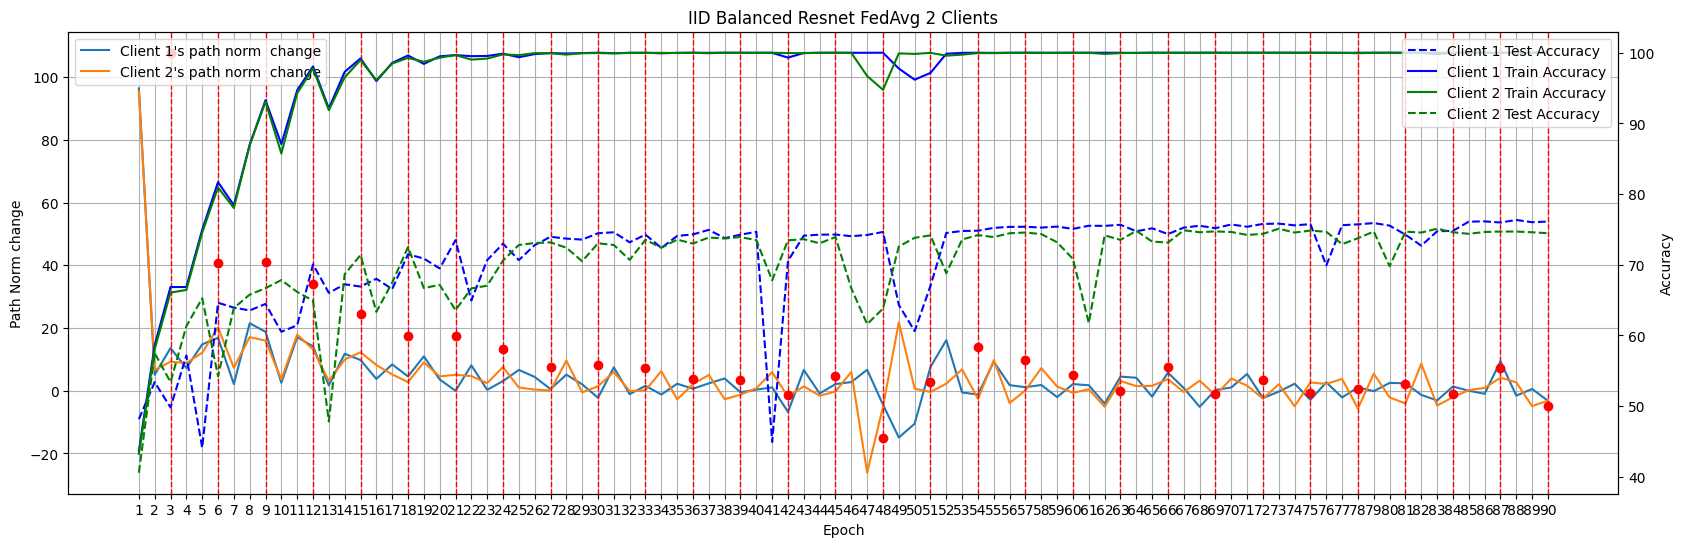

In [115]:
import matplotlib.pyplot as plt
epochs1 = range(1,len(local_path_norm1) )
epochs2 = range(1,len(local_path_norm2) )
global_epochs =range(1,len(global_path_norm))
# 绘制折线图
plt.figure(figsize=(20, 6))  # 宽度为10，高度为6

plt.plot(epochs1, change_local_path_norm1, label='Client 1\'s path norm  change')
plt.plot(epochs2, change_local_path_norm2, label='Client 2\'s path norm  change')
#plt.plot(epochs1, change_global_path_nrom, label='Global path norm rate of change')
# 设置 x 轴刻度，每步长为 1
plt.xticks(range(1, len(local_path_norm2)))

# 添加竖直的黑色虚线，每隔 3 步
for x in range(0, len(local_path_norm2),3):
        if x == 0:
            continue
        plt.axvline(x=x, color='red', linestyle='--', linewidth=1.0)
i=0
for x in range(3,len(local_path_norm1),3):
      plt.plot(x, change_global_path_nrom[i], 'ro') # 绘制红色圆点
      i = i+1
# 图表标题和标签
plt.title("IID Balanced Resnet FedAvg 2 Clients")
plt.xlabel("Epoch")
plt.ylabel("Path Norm change")
#plt.legend()
plt.grid()
plt.legend(loc="upper left")
#save as pdf
#plt.savefig("path_norm_rate_of_change.pdf", format='pdf', bbox_inches='tight')
ax2 = plt.gca().twinx()
ax2.plot(epochs1, local_test_accuracy1, 'b--', label="Client 1 Test Accuracy")
ax2.plot(epochs1, local_train_accuracy1, 'b-', label="Client 1 Train Accuracy")
ax2.plot(epochs2, local_train_accuracy2, 'g-', label="Client 2 Train Accuracy")
ax2.plot(epochs2, local_test_accuracy2, 'g--', label="Client 2 Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="upper right")
plt.savefig("IID_Balanced_Resnet_FedAvg_2_Clients.pdf", format='pdf', bbox_inches='tight')
# 显示图表
plt.show()
#save as pdf


30
90


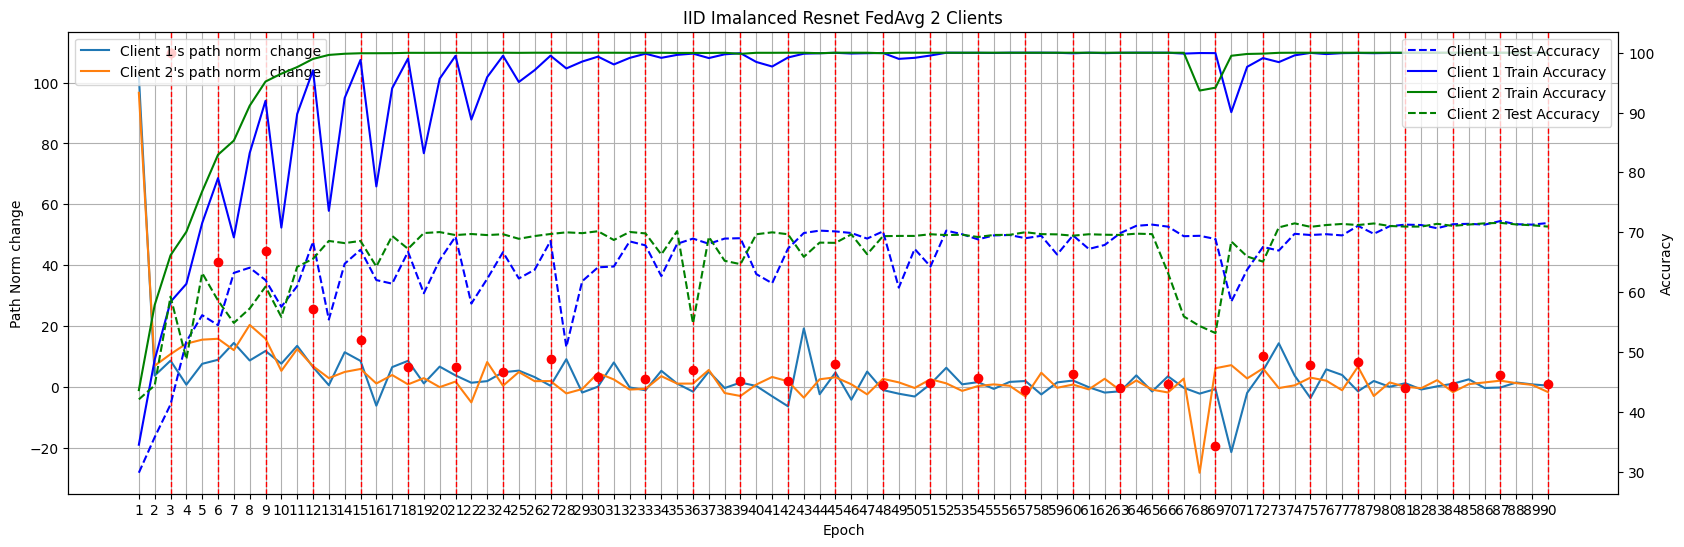

In [116]:
global_path_norm,global_train_loss, global_train_accuracy, global_test_loss, global_test_accuracy = Global_get_data(clients2_Iid_imbalanced_resnet_fedavg,0)
local_path_norm1, epoch1, local_train_loss1, local_train_accuracy1, local_test_loss1, local_test_accuracy1 = Local_get_data(clients2_Iid_imbalanced_resnet_fedavg,0)
local_path_norm2, epoch2, local_train_loss2, local_train_accuracy2, local_test_loss2, local_test_accuracy2 = Local_get_data(clients2_Iid_imbalanced_resnet_fedavg,1)
global_path_norm.insert(0,23.147414443305678)
local_path_norm1.insert(0,23.147414443305678)
local_path_norm2.insert(0,23.147414443305678)



change_global_path_nrom = get_change(global_path_norm)
change_local_path_norm1 = get_change(local_path_norm1)
change_local_path_norm2 = get_change(local_path_norm2)
print(len(change_global_path_nrom))
print(len(change_local_path_norm1))



import matplotlib.pyplot as plt
epochs1 = range(1,len(local_path_norm1) )
epochs2 = range(1,len(local_path_norm2) )
global_epochs =range(1,len(global_path_norm))
# 绘制折线图
plt.figure(figsize=(20, 6))  # 宽度为10，高度为6

plt.plot(epochs1, change_local_path_norm1, label='Client 1\'s path norm  change')
plt.plot(epochs2, change_local_path_norm2, label='Client 2\'s path norm  change')
#plt.plot(epochs1, change_global_path_nrom, label='Global path norm rate of change')
# 设置 x 轴刻度，每步长为 1
plt.xticks(range(1, len(local_path_norm2)))

# 添加竖直的黑色虚线，每隔 3 步
for x in range(0, len(local_path_norm2),3):
        if x == 0:
            continue
        plt.axvline(x=x, color='red', linestyle='--', linewidth=1.0)
i=0
for x in range(3,len(local_path_norm1),3):
      plt.plot(x, change_global_path_nrom[i], 'ro') # 绘制红色圆点
      i = i+1
# 图表标题和标签
plt.title("IID Imalanced Resnet FedAvg 2 Clients")
plt.xlabel("Epoch")
plt.ylabel("Path Norm change")
#plt.legend()
plt.grid()
plt.legend(loc="upper left")
#save as pdf
#plt.savefig("path_norm_rate_of_change.pdf", format='pdf', bbox_inches='tight')
ax2 = plt.gca().twinx()
ax2.plot(epochs1, local_test_accuracy1, 'b--', label="Client 1 Test Accuracy")
ax2.plot(epochs1, local_train_accuracy1, 'b-', label="Client 1 Train Accuracy")
ax2.plot(epochs2, local_train_accuracy2, 'g-', label="Client 2 Train Accuracy")
ax2.plot(epochs2, local_test_accuracy2, 'g--', label="Client 2 Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="upper right")
plt.savefig("IID_Imbalanced_Resnet_FedAvg_2_Clients.pdf", format='pdf', bbox_inches='tight')
# 显示图表
plt.show()
#save as pdf


30
90


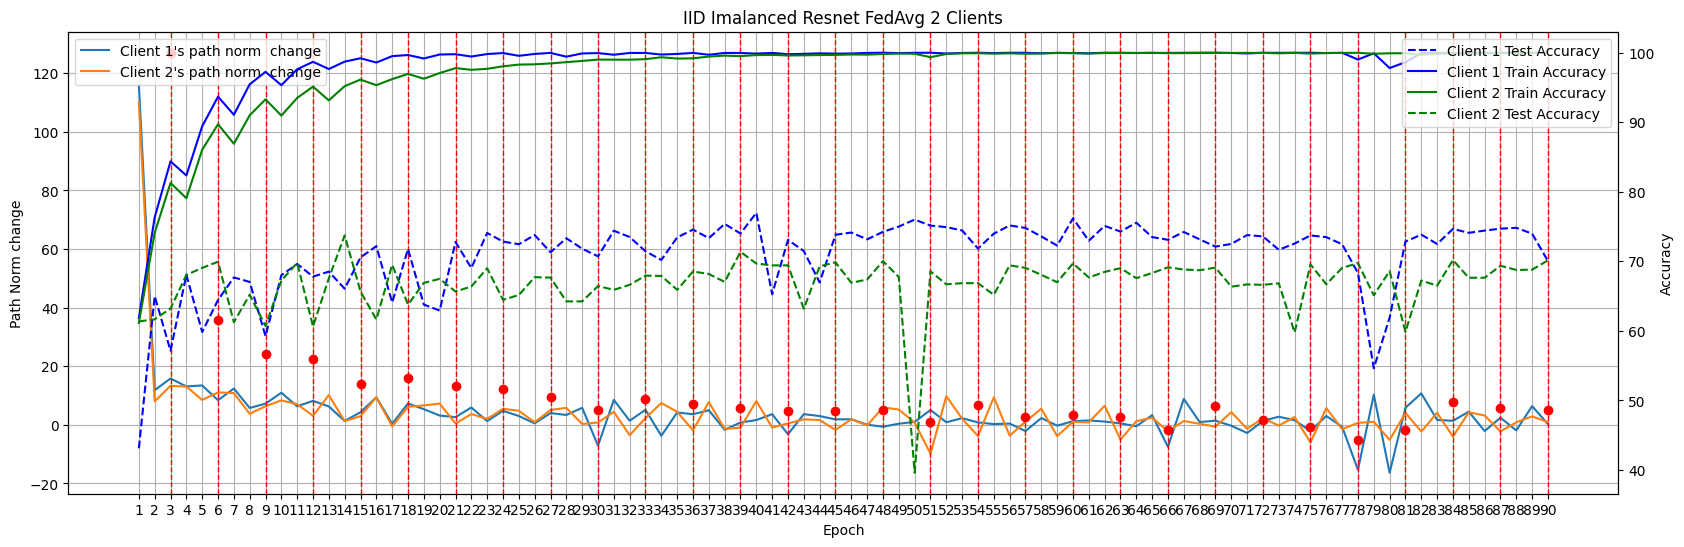

In [117]:
global_path_norm,global_train_loss, global_train_accuracy, global_test_loss, global_test_accuracy = Global_get_data(clients2_Non_iid_balanced_resnet_fedavg,0)
local_path_norm1, epoch1, local_train_loss1, local_train_accuracy1, local_test_loss1, local_test_accuracy1 = Local_get_data(clients2_Non_iid_balanced_resnet_fedavg,0)
local_path_norm2, epoch2, local_train_loss2, local_train_accuracy2, local_test_loss2, local_test_accuracy2 = Local_get_data(clients2_Non_iid_balanced_resnet_fedavg,1)
global_path_norm.insert(0,23.147414443305678)
local_path_norm1.insert(0,23.147414443305678)
local_path_norm2.insert(0,23.147414443305678)



change_global_path_nrom = get_change(global_path_norm)
change_local_path_norm1 = get_change(local_path_norm1)
change_local_path_norm2 = get_change(local_path_norm2)
print(len(change_global_path_nrom))
print(len(change_local_path_norm1))



import matplotlib.pyplot as plt
epochs1 = range(1,len(local_path_norm1) )
epochs2 = range(1,len(local_path_norm2) )
global_epochs =range(1,len(global_path_norm))
# 绘制折线图
plt.figure(figsize=(20, 6))  # 宽度为10，高度为6

plt.plot(epochs1, change_local_path_norm1, label='Client 1\'s path norm  change')
plt.plot(epochs2, change_local_path_norm2, label='Client 2\'s path norm  change')
#plt.plot(epochs1, change_global_path_nrom, label='Global path norm rate of change')
# 设置 x 轴刻度，每步长为 1
plt.xticks(range(1, len(local_path_norm2)))

# 添加竖直的黑色虚线，每隔 3 步
for x in range(0, len(local_path_norm2),3):
        if x == 0:
            continue
        plt.axvline(x=x, color='red', linestyle='--', linewidth=1.0)
i=0
for x in range(3,len(local_path_norm1),3):
      plt.plot(x, change_global_path_nrom[i], 'ro') # 绘制红色圆点
      i = i+1
# 图表标题和标签
plt.title("IID Imalanced Resnet FedAvg 2 Clients")
plt.xlabel("Epoch")
plt.ylabel("Path Norm change")
#plt.legend()
plt.grid()
plt.legend(loc="upper left")
#save as pdf
#plt.savefig("path_norm_rate_of_change.pdf", format='pdf', bbox_inches='tight')
ax2 = plt.gca().twinx()
ax2.plot(epochs1, local_test_accuracy1, 'b--', label="Client 1 Test Accuracy")
ax2.plot(epochs1, local_train_accuracy1, 'b-', label="Client 1 Train Accuracy")
ax2.plot(epochs2, local_train_accuracy2, 'g-', label="Client 2 Train Accuracy")
ax2.plot(epochs2, local_test_accuracy2, 'g--', label="Client 2 Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="upper right")
plt.savefig("Non-IID_Balanced_Resnet_FedAvg_2_Clients.pdf", format='pdf', bbox_inches='tight')
# 显示图表
plt.show()
#save as pdf


30
90


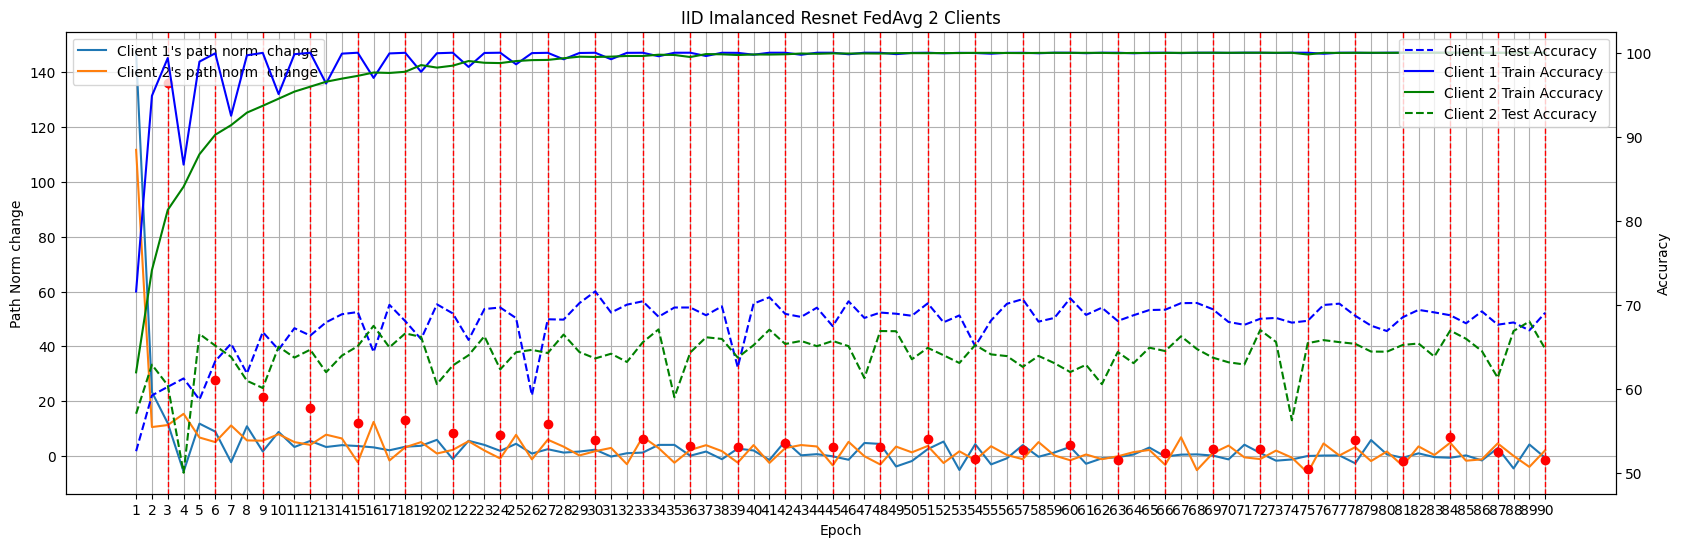

In [118]:
global_path_norm,global_train_loss, global_train_accuracy, global_test_loss, global_test_accuracy = Global_get_data(clients2_Non_iid_imbalanced_resnet_fedavg,0)
local_path_norm1, epoch1, local_train_loss1, local_train_accuracy1, local_test_loss1, local_test_accuracy1 = Local_get_data(clients2_Non_iid_imbalanced_resnet_fedavg,0)
local_path_norm2, epoch2, local_train_loss2, local_train_accuracy2, local_test_loss2, local_test_accuracy2 = Local_get_data(clients2_Non_iid_imbalanced_resnet_fedavg,1)
global_path_norm.insert(0,23.147414443305678)
local_path_norm1.insert(0,23.147414443305678)
local_path_norm2.insert(0,23.147414443305678)



change_global_path_nrom = get_change(global_path_norm)
change_local_path_norm1 = get_change(local_path_norm1)
change_local_path_norm2 = get_change(local_path_norm2)
print(len(change_global_path_nrom))
print(len(change_local_path_norm1))



import matplotlib.pyplot as plt
epochs1 = range(1,len(local_path_norm1) )
epochs2 = range(1,len(local_path_norm2) )
global_epochs =range(1,len(global_path_norm))
# 绘制折线图
plt.figure(figsize=(20, 6))  # 宽度为10，高度为6

plt.plot(epochs1, change_local_path_norm1, label='Client 1\'s path norm  change')
plt.plot(epochs2, change_local_path_norm2, label='Client 2\'s path norm  change')
#plt.plot(epochs1, change_global_path_nrom, label='Global path norm rate of change')
# 设置 x 轴刻度，每步长为 1
plt.xticks(range(1, len(local_path_norm2)))

# 添加竖直的黑色虚线，每隔 3 步
for x in range(0, len(local_path_norm2),3):
        if x == 0:
            continue
        plt.axvline(x=x, color='red', linestyle='--', linewidth=1.0)
i=0
for x in range(3,len(local_path_norm1),3):
      plt.plot(x, change_global_path_nrom[i], 'ro') # 绘制红色圆点
      i = i+1
# 图表标题和标签
plt.title("IID Imalanced Resnet FedAvg 2 Clients")
plt.xlabel("Epoch")
plt.ylabel("Path Norm change")
#plt.legend()
plt.grid()
plt.legend(loc="upper left")
#save as pdf
#plt.savefig("path_norm_rate_of_change.pdf", format='pdf', bbox_inches='tight')
ax2 = plt.gca().twinx()
ax2.plot(epochs1, local_test_accuracy1, 'b--', label="Client 1 Test Accuracy")
ax2.plot(epochs1, local_train_accuracy1, 'b-', label="Client 1 Train Accuracy")
ax2.plot(epochs2, local_train_accuracy2, 'g-', label="Client 2 Train Accuracy")
ax2.plot(epochs2, local_test_accuracy2, 'g--', label="Client 2 Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="upper right")
plt.savefig("Non-IID_Imbalanced_Resnet_FedAvg_2_Clients.pdf", format='pdf', bbox_inches='tight')
# 显示图表
plt.show()
#save as pdf
